In [58]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [44]:
obs = load('../../Feb2021/Final_Models/Teleconnections/TSdataObs.joblib') 
y=obs[((obs.time.dt.month>11) | (obs.time.dt.month<2)) & 
             (obs.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))

In [6]:
z500Data = xr.open_dataset('../../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')
zTS=z500Data.z

In [34]:
z=zTS[((zTS.time.dt.month>11) | (zTS.time.dt.month<2)) & (zTS.time.dt.year<2020)].sel(time=slice('1980-12-1','2018-1-31'))

In [70]:
zW=z.resample(time="QS-DEC").mean()
yW=y.resample(time="QS-DEC").mean()


In [71]:
#z.time
zDJ=zW[zW.time.dt.month==12]
yDJ=yW[yW.time.dt.month==12]

#np.corrcoef(yDJ,zDJ)

CC=xr.corr(yDJ, zDJ, dim="time")

In [72]:
CC

<xarray.DataArray (latitude: 46, longitude: 180)>
array([[0.21525283, 0.21525283, 0.21525283, ..., 0.21525283, 0.21525283,
        0.21525283],
       [0.23538962, 0.23495134, 0.23447872, ..., 0.23650496, 0.23616514,
        0.2357963 ],
       [0.25907437, 0.25824886, 0.2573445 , ..., 0.26106366, 0.26048142,
        0.25981687],
       ...,
       [0.48975253, 0.48572602, 0.48304887, ..., 0.50969388, 0.50175112,
        0.49602778],
       [0.482841  , 0.47837011, 0.47513585, ..., 0.49449012, 0.4910008 ,
        0.48660815],
       [0.47769437, 0.47442681, 0.46903905, ..., 0.48563084, 0.48271501,
        0.48095048]])
Coordinates:
  * longitude  (longitude) float32 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * latitude   (latitude) float32 90.0 88.0 86.0 84.0 82.0 ... 6.0 4.0 2.0 0.0

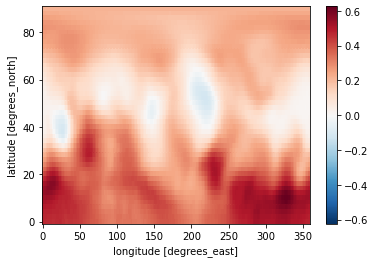

In [73]:
CC.plot()

In [74]:
def map_plot(ax1):
    ax1.coastlines()
    ax1.set_xticks([40,80,120,160,200,240,280,320,360 ], crs=ccrs.PlateCarree())
    ax1.set_yticks([0, 10, 20, 30, 40, 50, 60,70,80], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

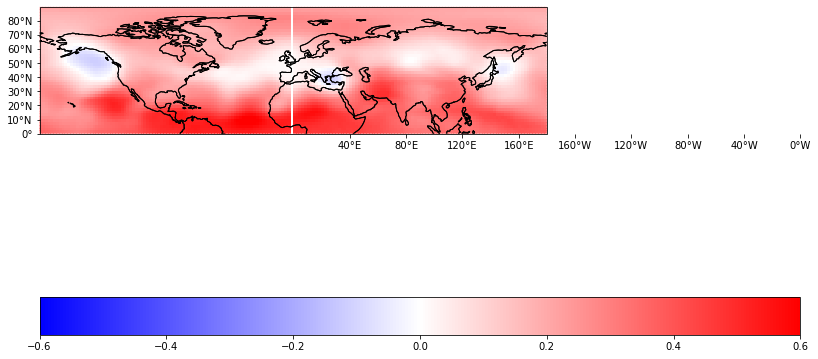

In [68]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(CC.longitude.values,CC.latitude.values,CC,transform=ccrs.PlateCarree(),cmap='bwr',vmax=0.6,vmin=-.6)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
# Recast levels to new class

#ax1.set_title(' GFDL All Widespread Fog Days Low Cloud %'+"    "+str(totalCnt) )
fig.colorbar(m1,orientation='horizontal')
#fig.colorbar(m1,orientation='horizontal')
#plt.savefig('../GFDLWDF_Cloud_All.jpeg',dpi=300)